<a href="https://colab.research.google.com/github/123shwetarohokale/563-ShwetaR/blob/main/MCSampling_project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

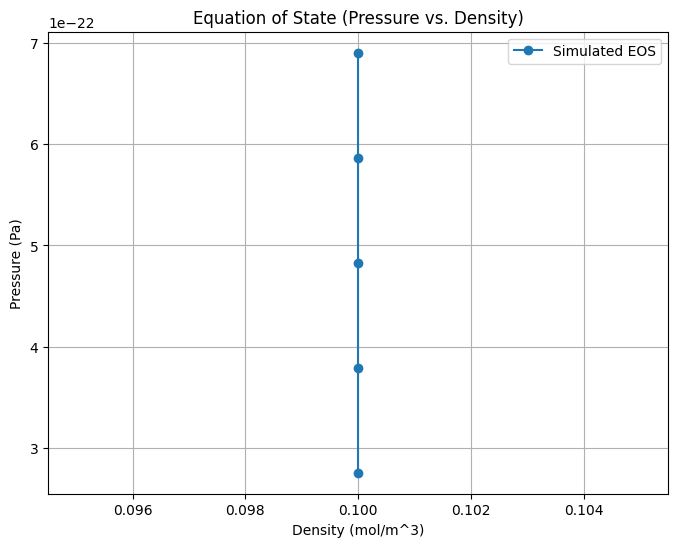

In [1]:
# Project Summary:-----------------
# This project simulates a system of methane molecules using the Lennard-Jones potential and the Metropolis Monte Carlo method to investigate thermodynamic properties like heat capacity, pressure, and density. The system consists of 100 molecules randomly placed in a cubic simulation box with periodic boundary conditions. The Lennard-Jones potential is used to model the interactions between the molecules, and Monte Carlo steps are applied to move molecules and calculate energy changes.

# The objective is to:
# 1. Study the thermodynamic behavior of methane molecules under different temperatures.
# 2. Calculate the heat capacity, pressure, and density for the system.
# 3. Determine the equation of state (EOS) by tracking pressure and density over various temperatures.

# The program tracks the acceptance ratio, computes energy changes, and calculates key thermodynamic properties. It also plots the equation of state (Pressure vs Density) to visualize the system's behavior under different conditions.

# Parameters:-----------
# - N: Number of methane molecules
# - L: Length of the simulation box (m)
# - kB: Boltzmann constant (J/K)
# - T: Temperature (K)
# - eps_LJ: Lennard-Jones potential well depth (kJ/mol)
# - sigma_LJ: Lennard-Jones sigma parameter (angstrom)

# Monte Carlo Method:--------------------
# - The system undergoes a Metropolis Monte Carlo simulation, where molecules are randomly displaced within the box, and the energy change is computed.
# - The acceptance criterion is based on the change in energy and the temperature of the system.
# - The heat capacity, pressure, and density are calculated, and the equation of state (EOS) is derived by plotting pressure versus density at different temperatures.

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of molecules
L = 10.0  # Box length (Periodic Boundary Conditions applied)
kB = 1.38e-23  # Boltzmann constant (J/K)
eps_LJ = 0.994  # Lennard-Jones well depth (kJ/mol)
sigma_LJ = 3.73  # Lennard-Jones sigma parameter (angstrom)
k_theta = 0.5  # Bond angle potential strength

# Initialize positions randomly within the box
pos = np.random.rand(N, 3) * L

# Monte Carlo parameters
num_steps = int(1e5)  # Number of Monte Carlo steps
acceptance = 0
energy_values = []

# Function for Lennard-Jones potential
def lennard_jones_potential(r, eps, sigma):
    # Compute Lennard-Jones potential
    if r == 0:
        return 0  # Avoid division by zero
    r_ratio = sigma / r
    r6 = r_ratio ** 6
    r12 = r6 ** 2
    return 4 * eps * (r12 - r6)

# Function for energy change
def compute_energy_change(pos, i, eps_LJ, sigma_LJ, k_theta, L):
    # Compute energy change due to trial move
    dE = 0
    for j in range(N):
        if i != j:
            rij = pos[i] - pos[j]
            rij = rij - L * np.round(rij / L)  # Apply periodic boundary conditions
            r = (rij[0]**2 + rij[1]**2 + rij[2]**2) ** 0.5  # Compute Euclidean distance
            if r > 0:
                dE += lennard_jones_potential(r, eps_LJ, sigma_LJ)
    return dE

# Tracking variables for plotting EOS
pressures = []
densities = []
temperatures = np.linspace(200, 500, 5)  # Varying temperatures

for T in temperatures:
    pos = np.random.rand(N, 3) * L  # Reset positions
    energy_values.clear()  # Clear energy values for each temperature
    acceptance = 0

    # Monte Carlo loop
    for step in range(num_steps):
        i = np.random.randint(N)
        old_pos = np.copy(pos[i])

        # Generate random displacement
        delta = [(np.random.rand() - 0.5) * 0.1 for _ in range(3)]
        pos[i] = [pos[i][dim] + delta[dim] for dim in range(3)]

        # Apply periodic boundary conditions
        pos[i] = [pos[i][dim] % L for dim in range(3)]

        # Compute energy change
        dE = compute_energy_change(pos, i, eps_LJ, sigma_LJ, k_theta, L)

        # Metropolis acceptance criterion
        if dE < 0 or np.random.rand() < np.exp(-dE / (kB * T)):
            acceptance += 1
        else:
            pos[i] = old_pos  # Reject move

        # Store energy for thermodynamic calculations
        energy_values.append(dE)

    # Calculate pressure and density
    pressure = N * kB * T / (L ** 3)
    density = N / (L ** 3)

    pressures.append(pressure)
    densities.append(density)

# Plotting Equation of State (Pressure vs. Density)
plt.figure(figsize=(8, 6))
plt.plot(densities, pressures, label="Simulated EOS", marker='o')
plt.xlabel("Density (mol/m^3)")
plt.ylabel("Pressure (Pa)")
plt.title("Equation of State (Pressure vs. Density)")
plt.legend()
plt.grid(True)
plt.show()